In [224]:
import PCH_series 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
import matplotlib.dates as mdates
from matplotlib import gridspec
import seaborn as sns
import numpy as np
from astropy.time import Time, TimeDelta
import astropy.units as u
from datetime import timedelta
import scipy.signal as sg
%matplotlib notebook

In [2]:
pch = PCH_series.PCH('/Users/mskirk/data/PCH_Project') 
wso = PCH_series.read_wso_data('/Users/mskirk/data/PCH_Project/WSO_PolarField.txt')

In [114]:
sns.set(style="darkgrid")

Create a timeline of postive and negative polar polarity.

<IPython.core.display.Javascript object>


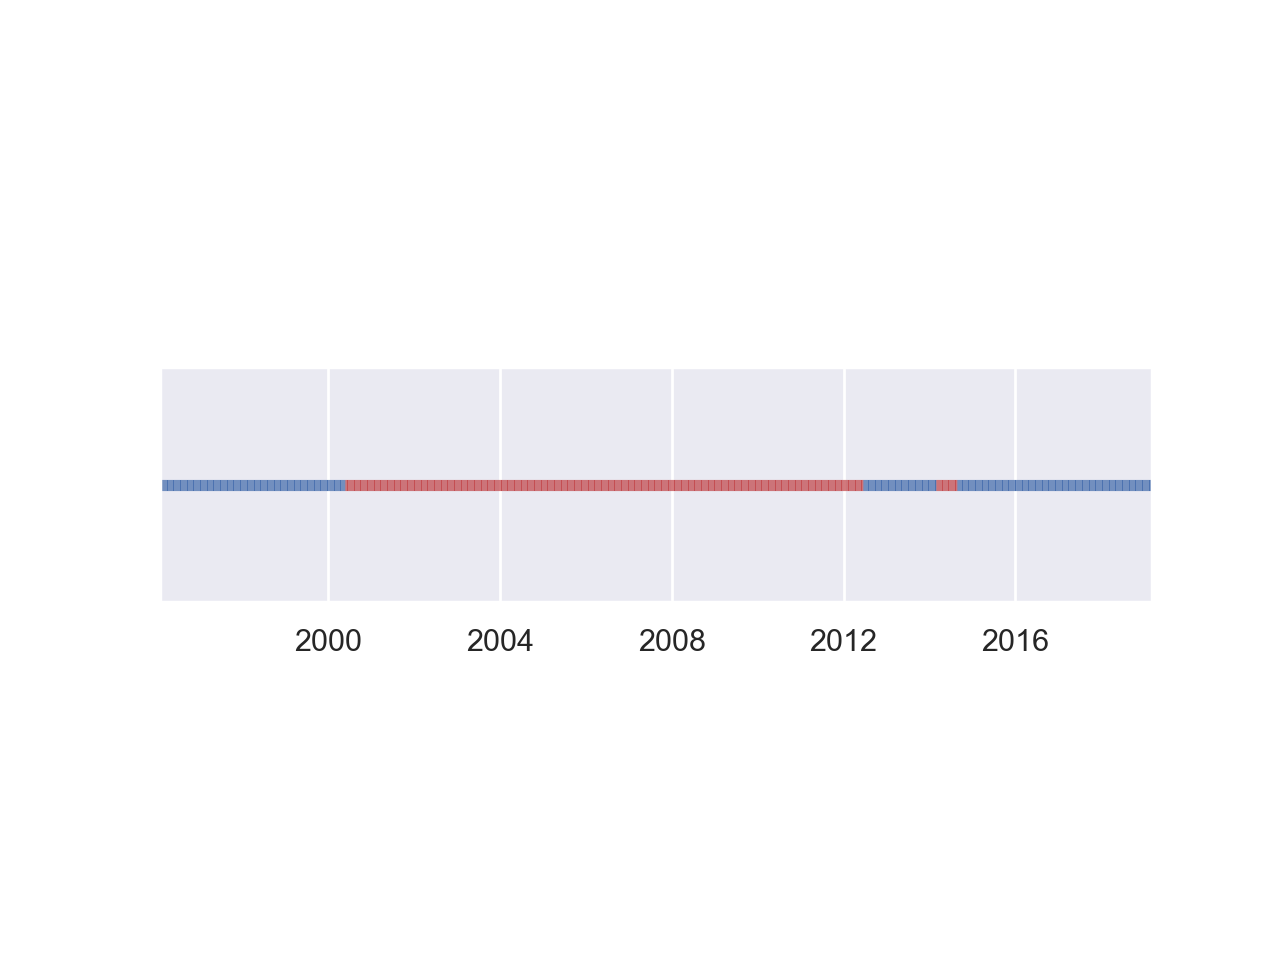

(728690.0, 737125.0)

In [124]:
# inxval in floor(JD − 1721424.5)
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'b']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
fig, axs = plt.subplots()
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.NorthFilter)
lc.set_linewidth(4)
line = axs.add_collection(lc)
axs.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
axs.xaxis.set_major_formatter(monthFmt)
axs.autoscale_view()
axs.set_ylim(-0.1, 0.1) 
axs.axes.get_yaxis().set_visible(False)
axs.set_aspect(10000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5)
axs.set_xlim(t_min, t_max)


<IPython.core.display.Javascript object>


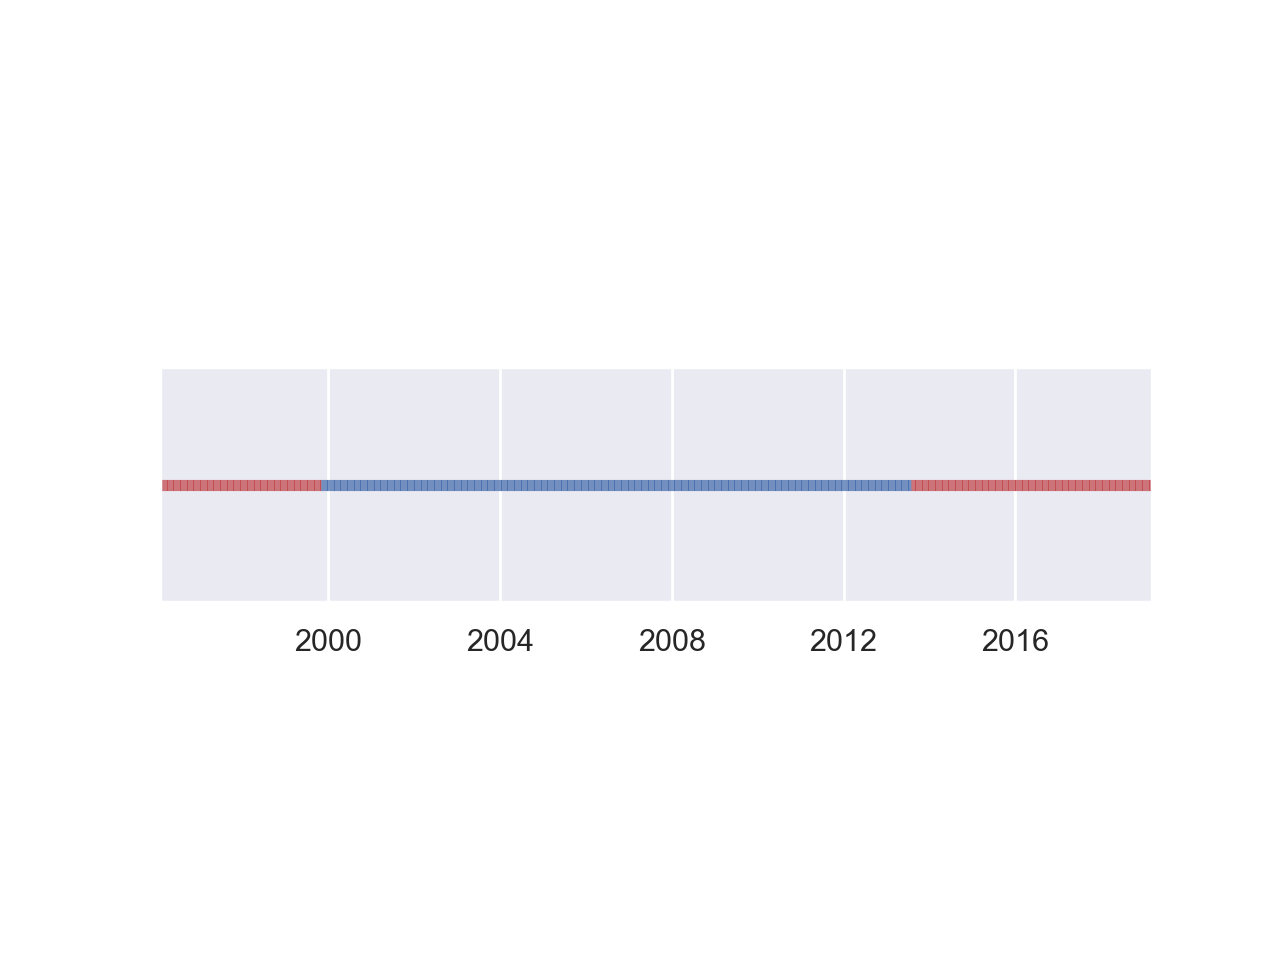

(728690.0, 737125.0)

In [125]:
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'b']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
fig, axs = plt.subplots()
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.SouthFilter)
lc.set_linewidth(4)
line = axs.add_collection(lc)
axs.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
axs.xaxis.set_major_formatter(monthFmt)
axs.autoscale_view()
axs.set_ylim(-0.1, 0.1) 
axs.axes.get_yaxis().set_visible(False)
axs.set_aspect(10000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5)
axs.set_xlim(t_min, t_max)

Let's Add the WSO data to the PCH Area Plots. Northern: 

<IPython.core.display.Javascript object>


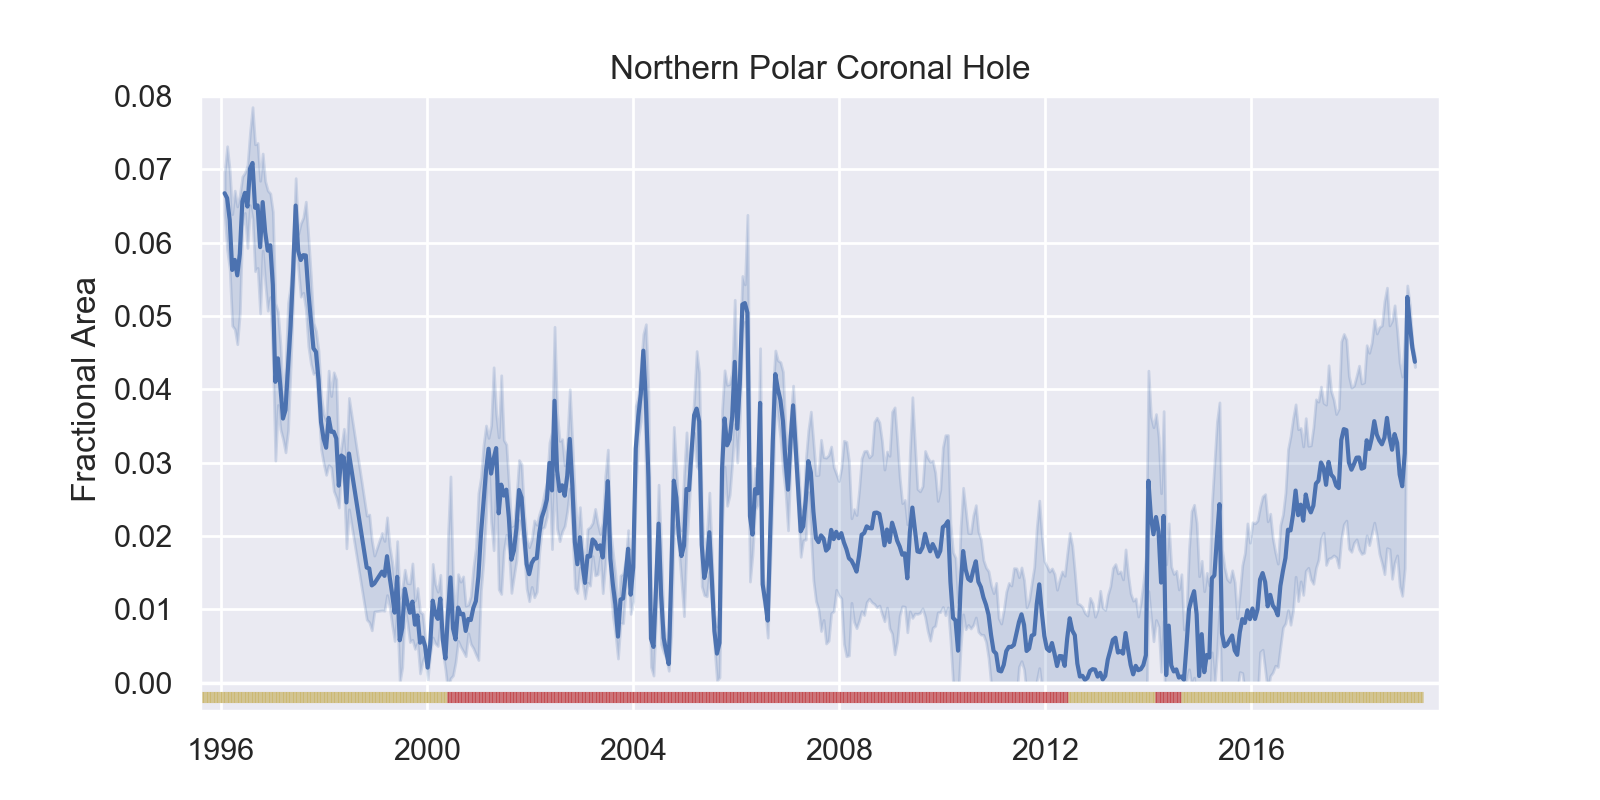

(728510.0, 737305.0)

In [190]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
north = pch.pch_obj.Area[pch.northern]
sns.lineplot(x=north.index.round('18D'), y=north, ci='sd', n_boot=1000, estimator='median', ax=ax)
ax.set_title('Northern Polar Coronal Hole')
ax.set_ylabel('Fractional Area')
ax.set_ylim(0, 0.08)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.NorthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

<IPython.core.display.Javascript object>


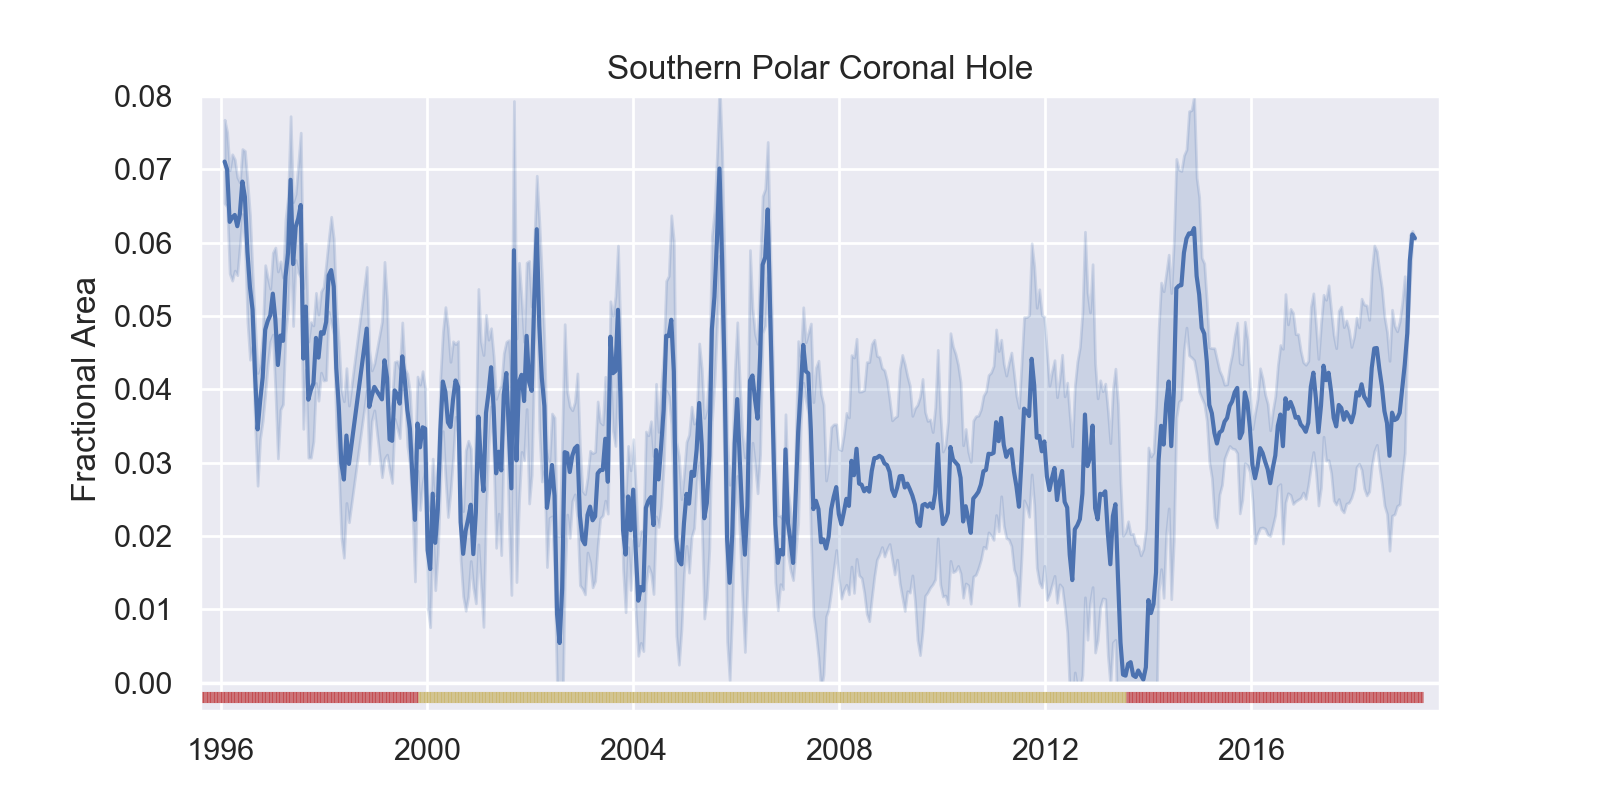

(728510.0, 737305.0)

In [189]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
south = pch.pch_obj.Area[pch.southern]
sns.lineplot(x=south.index.round('18D'), y=south, ci='sd', n_boot=1000, estimator='median', ax=ax)
ax.set_title('Southern Polar Coronal Hole')
ax.set_ylabel('Fractional Area')
ax.set_ylim(0, 0.08)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.SouthFilter.min(), 0, wso.SouthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.SouthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

<IPython.core.display.Javascript object>


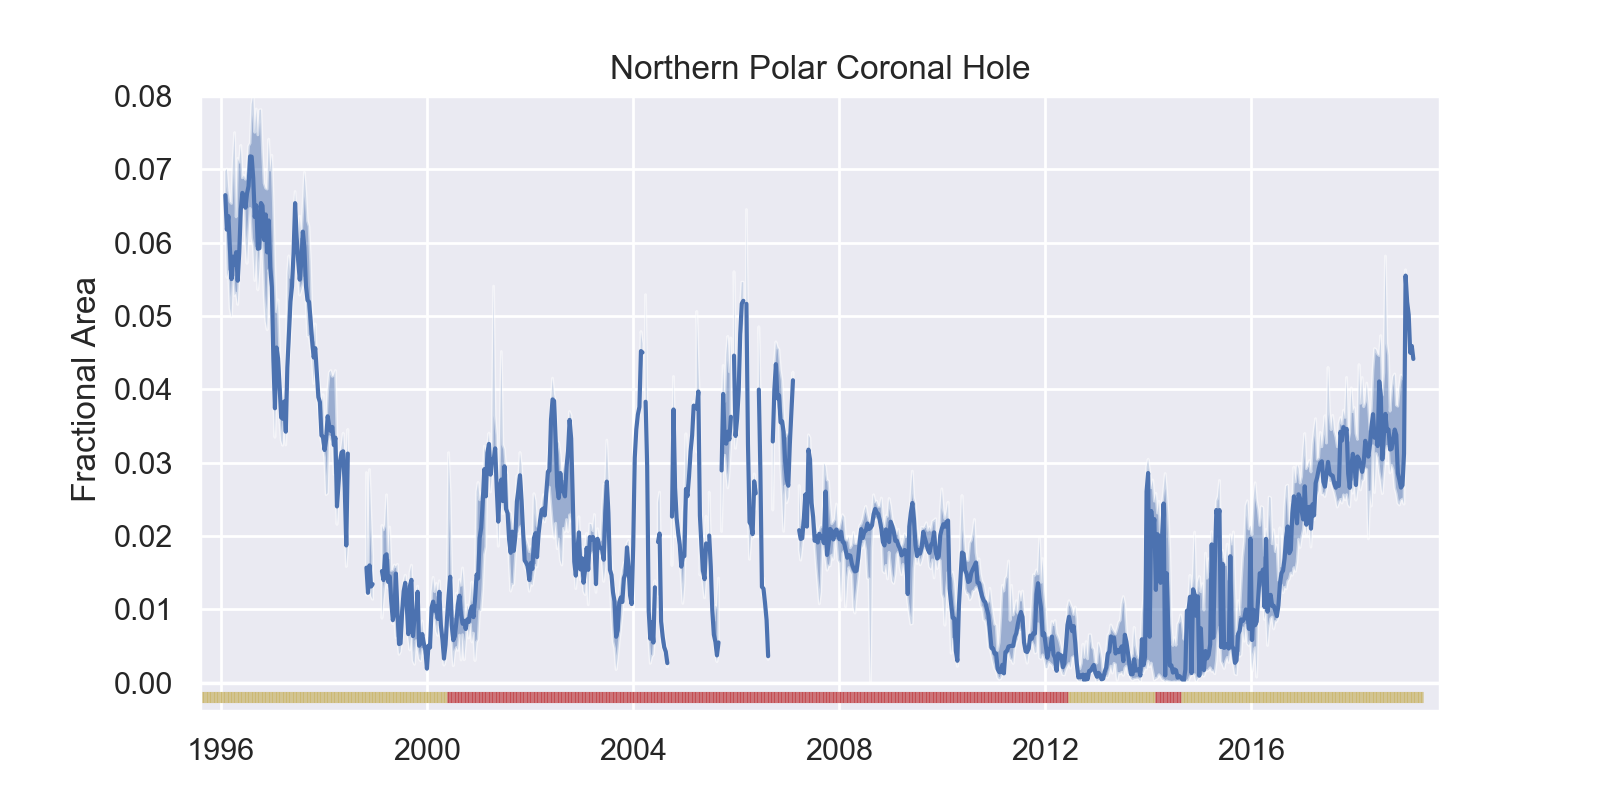

(728510.0, 737305.0)

In [194]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
north = pch.pch_obj.Area[pch.northern].resample('11D').median()
plt.plot(north)
plt.fill_between(pch.confidence.index, pch.confidence.north_area_low, pch.confidence.north_area_high, alpha=0.5)
ax.set_title('Northern Polar Coronal Hole')
ax.set_ylabel('Fractional Area')
ax.set_ylim(0, 0.08)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.NorthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

<IPython.core.display.Javascript object>


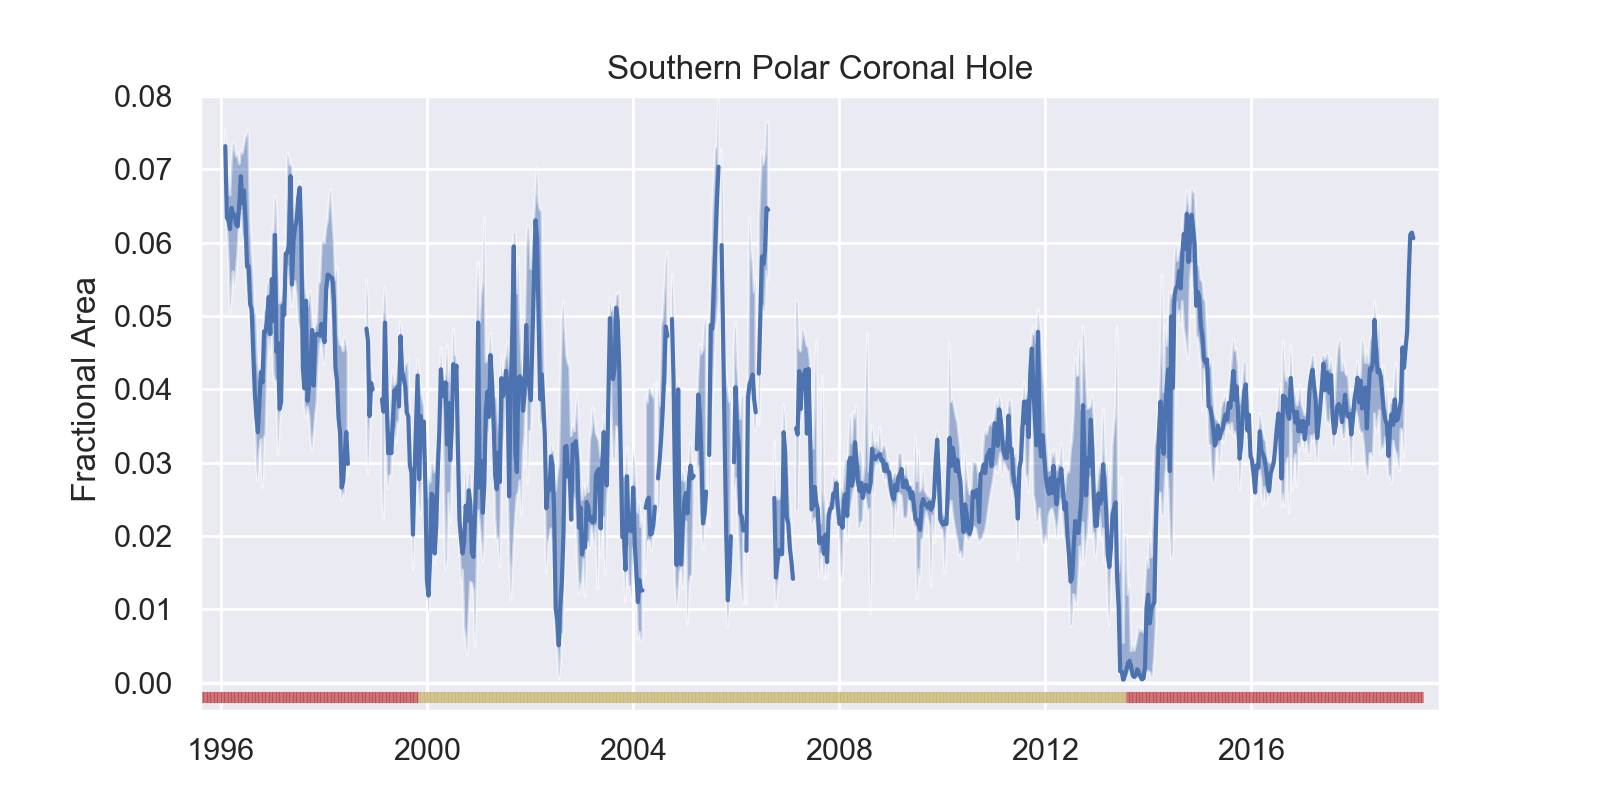

(728510.0, 737305.0)

In [196]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
south = pch.pch_obj.Area[pch.southern].resample('11D').median()
plt.plot(south)
plt.fill_between(pch.confidence.index, pch.confidence.south_area_low, pch.confidence.south_area_high, alpha=0.5)
ax.set_title('Southern Polar Coronal Hole')
ax.set_ylabel('Fractional Area')
ax.set_ylim(0, 0.08)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.SouthFilter.min(), 0, wso.SouthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.SouthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

<IPython.core.display.Javascript object>


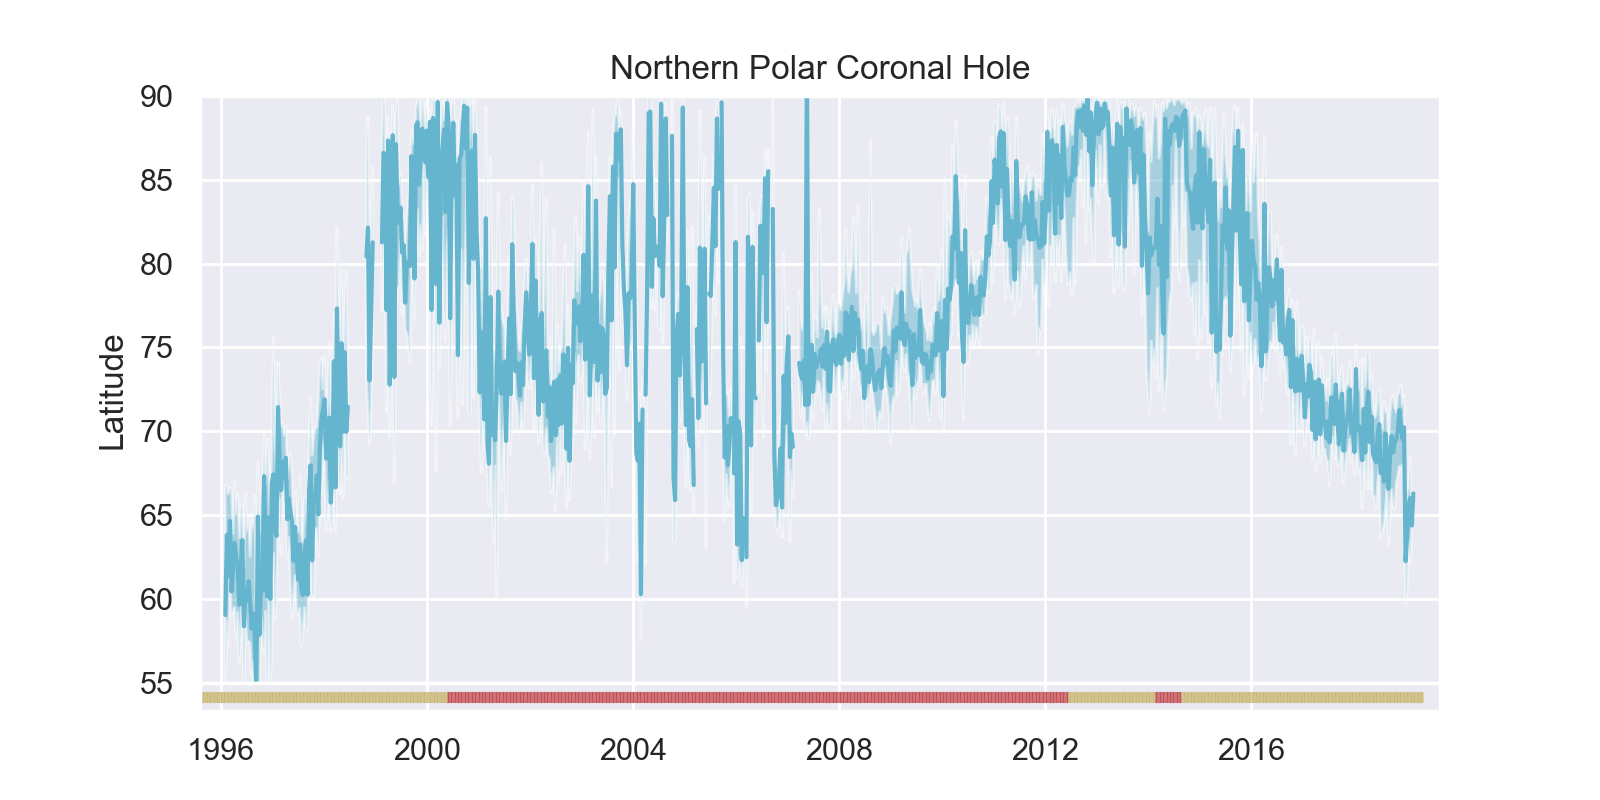

(728510.0, 737305.0)

In [208]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
north = pch.pch_obj.Fit[pch.northern].resample('11D').median()
plt.plot(north, 'c')
plt.fill_between(pch.confidence.index, pch.confidence.north_fit_low, pch.confidence.north_fit_high, facecolor='c',alpha=0.5)
ax.set_title('Northern Polar Coronal Hole')
ax.set_ylabel('Latitude')
ax.set_ylim(55, 90)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.NorthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

<IPython.core.display.Javascript object>


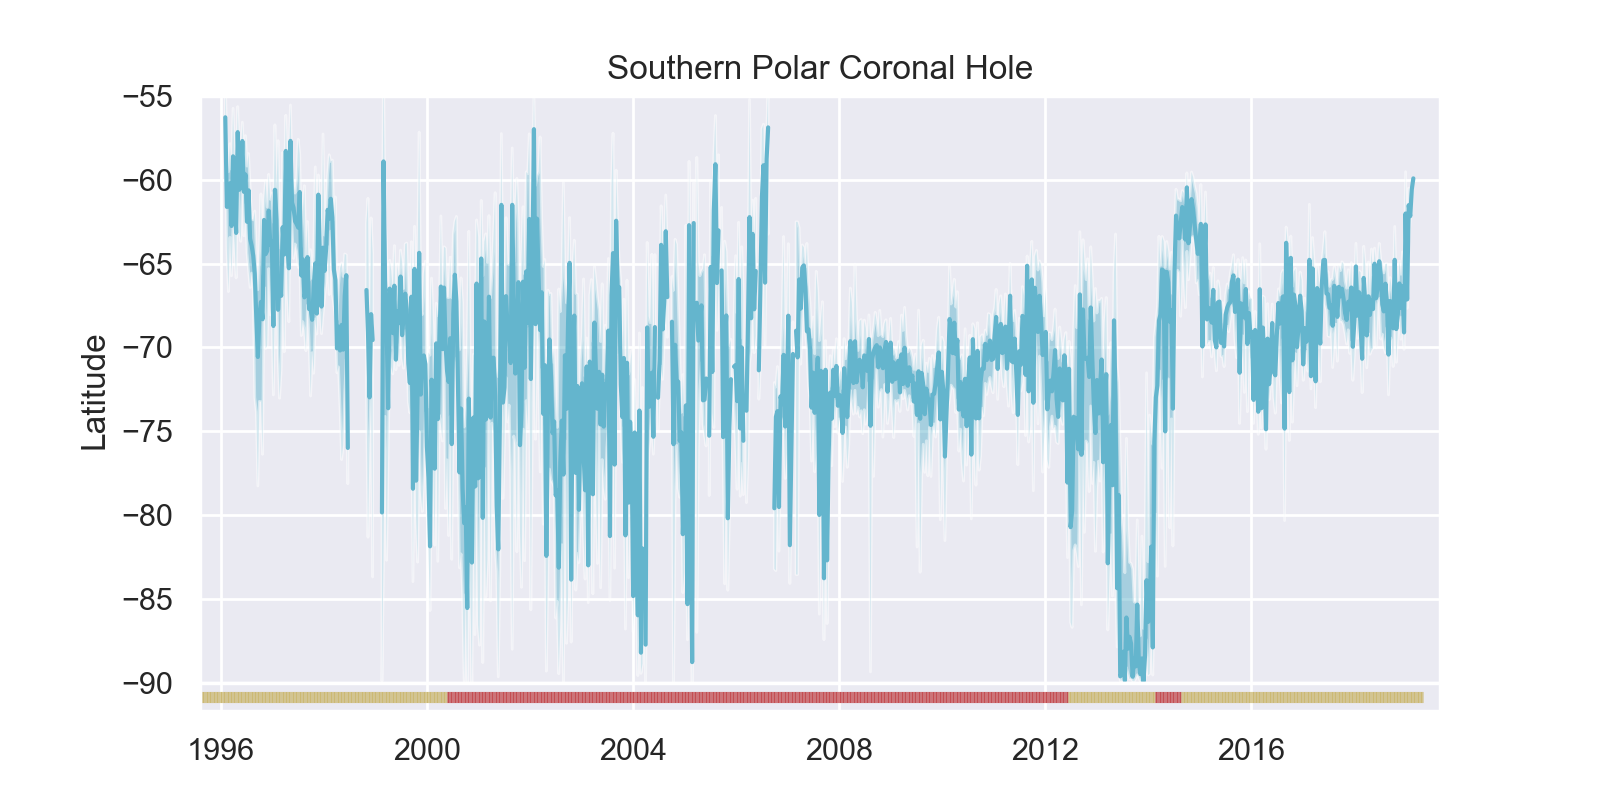

(728510.0, 737305.0)

In [215]:
fig = plt.figure(figsize=(8, 4))
outer_grid = gridspec.GridSpec(2, 1, wspace=0.0, hspace=0.0,height_ratios=[20, 1])
ax = fig.add_subplot(outer_grid[0])
south = pch.pch_obj.Fit[pch.southern].resample('11D').median()
plt.fill_between(pch.confidence.index, pch.confidence.south_fit_low, pch.confidence.south_fit_high, facecolor='c',alpha=0.5)
plt.plot(south, 'c')
ax.set_title('Southern Polar Coronal Hole')
ax.set_ylabel('Latitude')
ax.set_ylim(-90, -55)
ax.set_xlim(pch.pch_obj.index[0] - timedelta(days=180), pch.pch_obj.index[-1] + timedelta(days=180))
ax.set_xlabel('')
ax.set_xticklabels([])


ax1 = fig.add_subplot(outer_grid[1])
inxval = mdates.date2num(wso.index.to_pydatetime())
y = np.zeros_like(inxval)
points = np.array([inxval, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) 
cmap = ListedColormap(['r', 'y']) 
norm = BoundaryNorm([wso.NorthFilter.min(), 0, wso.NorthFilter.max()], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(wso.NorthFilter)
lc.set_linewidth(4)
line = ax1.add_collection(lc)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
monthFmt = mdates.DateFormatter("%Y")
ax1.xaxis.set_major_formatter(monthFmt)
ax1.autoscale_view()
ax1.set_ylim(-0.1, 0.1) 
ax1.axes.get_yaxis().set_visible(False)
ax1.set_aspect(1000)
t_min = np.floor(Time(pch.pch_obj.index[0]).jd - 1721424.5 -180)
t_max = np.floor(Time(pch.pch_obj.index[-1]).jd - 1721424.5 +180)
ax1.set_xlim(t_min, t_max)

In [228]:
def low_butter_filter(series, period_low=0.82, filter_type='lowpass', Series=False, show_spectrum=False):
    
    # low pass filter
    # peroids low are in years
    # pd series must have a consistent frequency defined

    fs = 1/TimeDelta(series.index.freq.delta).to(u.yr)

    b, a = sg.butter(6, period_low, btype=filter_type, fs=fs.value)

    if show_spectrum:
        f, Pxx_spec = signal.periodogram(sg.filtfilt(b, a, series.interpolate('linear')), fs.value, 'flattop', scaling='spectrum')
        plt.semilogy(f, np.sqrt(Pxx_spec))
        plt.show()

    if Series:
        return pd.Series(sg.filtfilt(b, a, series.interpolate('linear')), index=series.index)

    return sg.filtfilt(b, a, series.interpolate('linear'))

<IPython.core.display.Javascript object>


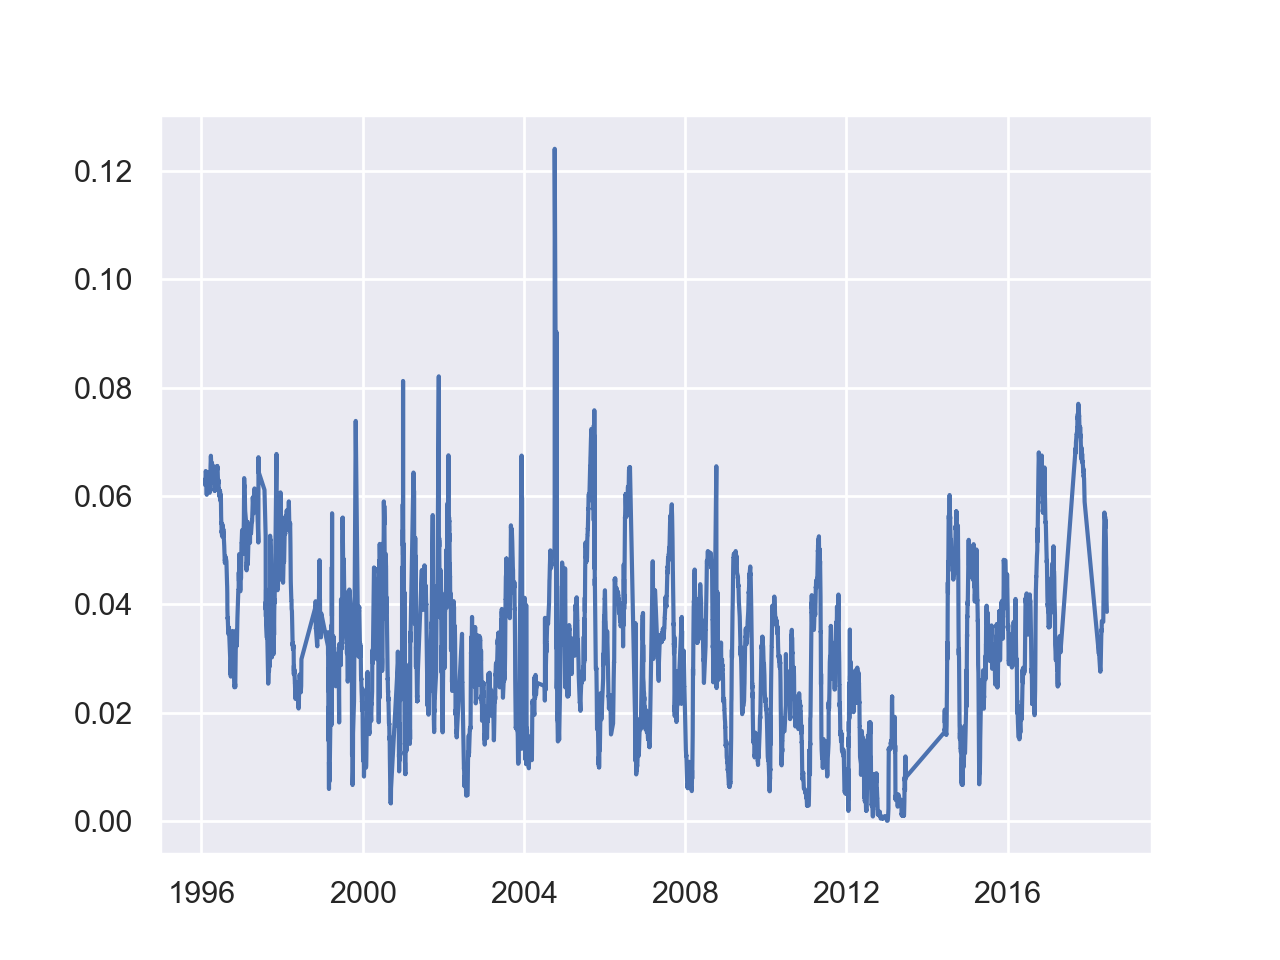

In [254]:
plt.plot(pch.pch_obj.Area[(pch.pch_obj.Filter == 'EIT195') & (pch.pch_obj.StartLat < 0)])

Some other fun plots:

In [257]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8, 4)) 
north = pch.pch_obj.Fit[pch.northern].resample('0.5D').median()
plt.plot(north[north.index[0]:north.index[0]+timedelta(days=33)], '.')
plt.ylim(55,90)
plt.xlim(north.index[0],north.index[0]+timedelta(days=33))

True

In [ ]:
for ii in range(((north.index[-1] - north.index[0])-timedelta(days=33)).days):
    plt.clf()
    plt.plot(north[north.index[0]+timedelta(days=ii):north.index[0]+timedelta(days=33)+timedelta(days=ii)], '.')
    plt.ylim(55,90)
    plt.xlim(north.index[0]+timedelta(days=ii),north.index[0]+timedelta(days=33)+timedelta(days=ii))
    plt.ylabel('Latitude')
    plt.xlabel('Date')
    plt.title('Northern Polar Hole Boundary')
    fig.savefig('/Users/mskirk/Desktop/PCHBoundary/NPCH_boundary'+np.str(ii)+'.png')